# Logistic回归

- 优点：计算代价不高，易于理解和实现
- 缺点：容易欠拟合，分类精度可能不高

## sigmoid function

$$\sigma (z) = \frac 1 {1+e^{-z}}$$

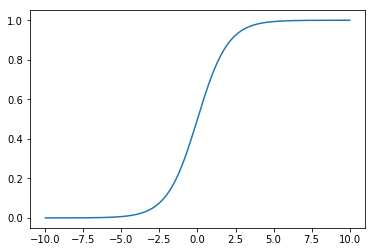

In [1]:
# 绘制sigmoid function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, num=10000)
y = 1 / (1 + np.exp(-x))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()

$$ h(x)_{\theta} = {\theta}_0 + {\theta}_{1}x_{1} + {\theta}_2x_{2} $$

$$J(\theta) = \frac {(h(x)_\theta - y)^2} 2$$

这里的 $\frac 1 2 $ 是为了求导方便，因为可以实际上没有什么意义，因为可以通过学习率进行调整。

$$
\begin{split}
\frac \partial {\partial \theta_{i}} J(\theta_i)
&= \frac \partial {\partial \theta_{i}} \frac 1 2 (h_\theta (x) - y)^2 \\
&=  (h_\theta (x) - y) \frac \partial {\partial \theta_{i}} h_{\theta}(x) \\
&=  (h_\theta (x) - y) \frac \partial {\partial \theta_{i}} ( \sum_{i=0}^{n} \theta_{i} x_i ) \\
&=  (h_{\theta}(x) - y) x_{i}
\end{split}
$$


In [41]:
def loadDataSet():
    dataMat, labelMat = [], []
    with open('./testSet.txt') as f:
        for line in f.readlines():
            lineArr = line.strip().split()
            # 这里之所以多一个1.0 是因为对于theta_0来说输入总是1（这样的好处是可以更方便的进行矩阵运算
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def gradAscent(dataMatIn, classLabel):
    '''梯度上升算法'''
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabel).transpose()
    m,n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weight = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weight)
        error = (labelMat - h)
        weight = weight + alpha * dataMatrix.transpose() * error
    return weight

In [42]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

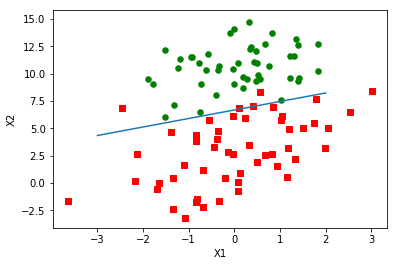

In [10]:
import matplotlib.pyplot as plt
def plotBestFit(weight, dataMat, labelMat ):
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 1)
    # h(X)_W = W[0] + W[1]*X[1] + W[2]*X[2] = 0
    #  X[2] = (-W[0] - W[1]*X[1]) / W[2]
    y = (-weight[0]-weight[1]*x)/weight[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

dataMat, labelMat = loadDataSet()
weight = gradAscent(dataMat, labelMat)
plotBestFit(weight.getA(), dataMat, labelMat)

In [43]:
def stocGradAscent0(dataMatrix, classLabel):
    '''随机梯度上升'''
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabel[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

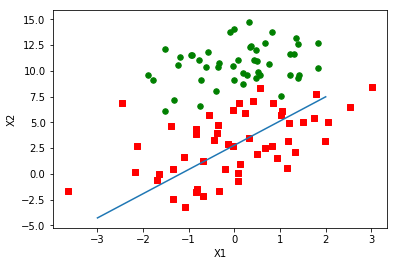

In [44]:
dataMat, labelMat = loadDataSet()
weights = stocGradAscent0(np.array(dataMat), labelMat)
plotBestFit(weights, dataMat, labelMat)

In [45]:
import random
def stocGradAscent1(dataMatrix, classLabel, numIter = 50):
    '''随机梯度上升'''
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = random.randint(0, m - 1)
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabel[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
    return weights

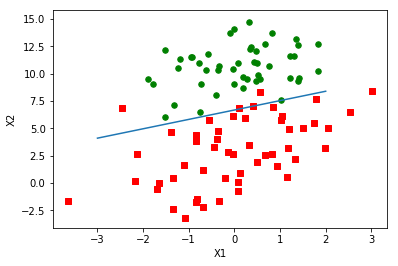

In [46]:
dataMat, labelMat = loadDataSet()
weights = stocGradAscent1(np.array(dataMat), labelMat)
plotBestFit(weights, dataMat, labelMat)

In [55]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    trainingSet, trainingLabel = [], []
    with open('./horseColicTraining.txt') as f:
        for line in f.readlines():
            currentLine = line.strip().split('\t')
            currentLine = list(map(float, currentLine))
            trainingSet.append(currentLine[:21])
            trainingLabel.append(currentLine[21])
    trainWeight = stocGradAscent1(np.array(trainingSet), trainingLabel, 500)
    errorCount, numTestVec = 0, 0.0
    with open('./horseColicTest.txt') as f:
        for line in f.readlines():
            numTestVec += 1.0
            currLine = line.strip().split('\t')
            currLine = list(map(float, currLine))
            lineArr = currLine[:21]
            if int(currLine[21]) != int(classifyVector(lineArr, trainWeight)):
                errorCount+=1
    errorRate = float(errorCount)/numTestVec
    print("the error rate is:", errorRate)
    return errorRate

In [56]:
colicTest()

/home/wuxiaobai24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


the error rate is: 0.4626865671641791


0.4626865671641791

In [57]:
def multiTest():
    numTest, errorSum = 10, 0.0
    for k in range(numTest):
        errorSum += colicTest()
    print("after %d iterations the avg error rate is %f" % (numTest, errorSum / float(numTest)))

In [58]:
multiTest()

/home/wuxiaobai24/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


the error rate is: 0.26865671641791045
the error rate is: 0.29850746268656714
the error rate is: 0.2835820895522388
the error rate is: 0.26865671641791045
the error rate is: 0.23880597014925373
the error rate is: 0.2835820895522388
the error rate is: 0.2835820895522388
the error rate is: 0.44776119402985076
the error rate is: 0.2537313432835821
the error rate is: 0.26865671641791045
after 10 iterations the avg error rate is 0.289552
